In [1]:
import pandas as pd
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.compose import ColumnTransformer
import keras

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import os

import math


from tensorflow.keras.utils import Sequence
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import datetime as dt

import warnings
warnings.filterwarnings('ignore')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)  # turn off deprecation warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


2023-04-24 14:22:39.276852: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-24 14:22:39.880326: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-24 14:22:39.897036: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-24 14:22:42.089603: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Prepare Data


In [2]:
df = pd.read_csv('../../../data/latest_hour_final_eth.csv')

In [3]:
df

,Unnamed: 0,datetime,open,high,low,close,volume,close_time,qav,num_trades,...,macd,macd_diff,macd_signal,mi,sma,wma,stc,vi_pos,vi_neg,DATE
0,719,1612065600000,1357.49,1365.20,1351.00,1361.76,26730.73431,1612069199999,3.633144e+07,25087,...,23.727350,-0.723529,24.450879,115.189620,1358.753333,1316.890267,29.908436,0.967569,1.075689,2021-01-31
1,720,1612069200000,1361.76,1361.82,1344.78,1350.49,30526.38093,1612072799999,4.125934e+07,28101,...,22.717871,-1.516382,24.234253,115.030193,1358.988000,1317.186546,14.954218,0.958783,1.060305,2021-01-31
2,721,1612072800000,1350.49,1354.76,1345.42,1348.99,24665.23762,1612076399999,3.330100e+07,20654,...,21.692923,-2.223664,23.916587,114.876492,1359.141000,1317.471647,7.477109,0.962119,1.093234,2021-01-31
3,722,1612076400000,1348.82,1355.53,1342.00,1346.28,28519.50755,1612079999999,3.847172e+07,23997,...,20.596771,-2.904839,23.501610,114.770037,1359.375000,1317.739027,3.738554,0.957859,1.067242,2021-01-31
4,723,1612080000000,1346.28,1354.00,1338.63,1348.50,34132.90559,1612083599999,4.598605e+07,27634,...,19.672854,-3.350161,23.023015,114.696617,1359.658667,1318.016193,1.869277,0.989830,1.041412,2021-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19425,20234,1682348400000,1855.23,1855.24,1830.00,1834.17,29717.10440,1682351999999,5.468120e+07,40079,...,-43.408084,2.233008,-45.641092,118.210916,1860.829000,1962.576804,65.015006,0.917029,1.045936,2023-04-24
19426,20235,1682352000000,1834.18,1842.63,1811.16,1814.31,39384.99850,1682355599999,7.197751e+07,53900,...,-44.701081,0.822510,-45.523591,118.426194,1860.049667,1961.710444,32.507503,0.892510,1.061577,2023-04-24
19427,20236,1682355600000,1814.32,1838.55,1806.00,1834.29,34783.30130,1682359199999,6.345159e+07,46660,...,-44.884213,0.559455,-45.443668,118.739053,1859.540333,1960.955176,16.253752,0.885006,1.073671,2023-04-24
19428,20237,1682359200000,1834.29,1847.62,1827.64,1831.61,16801.85170,1682362799999,3.085362e+07,28388,...,-45.133440,0.271450,-45.404890,119.044207,1859.126167,1960.185390,8.126876,0.912728,1.066725,2023-04-24


In [4]:

df.drop(columns=['Unnamed: 0','datetime','DATE'], inplace=True)
df

,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,...,ichimoku_conversion_line,macd,macd_diff,macd_signal,mi,sma,wma,stc,vi_pos,vi_neg
0,1357.49,1365.20,1351.00,1361.76,26730.73431,1612069199999,3.633144e+07,25087,12826.68549,1.743545e+07,...,1370.500,23.727350,-0.723529,24.450879,115.189620,1358.753333,1316.890267,29.908436,0.967569,1.075689
1,1361.76,1361.82,1344.78,1350.49,30526.38093,1612072799999,4.125934e+07,28101,12918.38538,1.746405e+07,...,1367.390,22.717871,-1.516382,24.234253,115.030193,1358.988000,1317.186546,14.954218,0.958783,1.060305
2,1350.49,1354.76,1345.42,1348.99,24665.23762,1612076399999,3.330100e+07,20654,12357.64565,1.668419e+07,...,1367.390,21.692923,-2.223664,23.916587,114.876492,1359.141000,1317.471647,7.477109,0.962119,1.093234
3,1348.82,1355.53,1342.00,1346.28,28519.50755,1612079999999,3.847172e+07,23997,14194.92640,1.915262e+07,...,1365.130,20.596771,-2.904839,23.501610,114.770037,1359.375000,1317.739027,3.738554,0.957859,1.067242
4,1346.28,1354.00,1338.63,1348.50,34132.90559,1612083599999,4.598605e+07,27634,16601.01642,2.237030e+07,...,1359.685,19.672854,-3.350161,23.023015,114.696617,1359.658667,1318.016193,1.869277,0.989830,1.041412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19425,1855.23,1855.24,1830.00,1834.17,29717.10440,1682351999999,5.468120e+07,40079,12003.39780,2.209746e+07,...,1851.710,-43.408084,2.233008,-45.641092,118.210916,1860.829000,1962.576804,65.015006,0.917029,1.045936
19426,1834.18,1842.63,1811.16,1814.31,39384.99850,1682355599999,7.197751e+07,53900,19563.11580,3.575098e+07,...,1843.675,-44.701081,0.822510,-45.523591,118.426194,1860.049667,1961.710444,32.507503,0.892510,1.061577
19427,1814.32,1838.55,1806.00,1834.29,34783.30130,1682359199999,6.345159e+07,46660,18795.31380,3.430147e+07,...,1841.095,-44.884213,0.559455,-45.443668,118.739053,1859.540333,1960.955176,16.253752,0.885006,1.073671
19428,1834.29,1847.62,1827.64,1831.61,16801.85170,1682362799999,3.085362e+07,28388,8689.57450,1.595836e+07,...,1841.095,-45.133440,0.271450,-45.404890,119.044207,1859.126167,1960.185390,8.126876,0.912728,1.066725


In [5]:
scaler = MinMaxScaler()


# Fit the scaler on your dataframe (let's say it's called df)
df_normalized = scaler.fit_transform(df)

# Convert the normalized data back to a dataframe
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

In [6]:

# Convert the DataFrame to a NumPy array
raw_data = df_normalized.values
close = df_normalized['close'].values
close = close.reshape((len(close),1))
# Display the NumPy array
print(type(raw_data))
print(raw_data.shape)
print(close.shape)

<class 'numpy.ndarray'>
(19430, 72)
(19430, 1)


## Prepare Model

In [7]:
print('Prep Data')
num_train_samples = int(0.6 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)


Prep Data
num_train_samples: 11658
num_val_samples: 4857
num_test_samples: 2915


In [8]:
# Set Parameters

# delay: time in future that will be predicted
delay = 12


# sampling rate: period between timesteps within the sequence
# Sequence with rate=1 : t1,t2...tn
# Sequence with rate=3 : t1,t3...tn*3
sampling_rate = 1

# sequence length: sequence lenght of each sample
half_day = 1
sequence_length = 4 * 24


# sequence_stride: period between sequences
# First sequence starts at t0
# Second sequence will start at t1 with sequence_stride=1 or at t5 with sequence_stride=5
sequence_stride = 1

#batch_size: Number of timeseries samples in each batch (except maybe the last one). 
#If None, the data will not be batched (the dataset will yield individual samples).
# Huge impact in performance.
# Tip, should be multiple of 8
batch_size = 32

# Understanding our parameters
msg = f"The timeseries will consist of batches containing {batch_size} sequences of {sequence_length} samples."

msg += f"\nFinally our target is {delay} timesteps in the future, and will have data from {sequence_length * sampling_rate} timesteps in the past"
print(msg)

The timeseries will consist of batches containing 32 sequences of 96 samples.
Finally our target is 12 timesteps in the future, and will have data from 96 timesteps in the past


In [9]:
train_dataset = keras.preprocessing.timeseries_dataset_from_array(
                        raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False, # Shouldn't the shuffle be set to 0?
                    seed=33,
                    batch_size=batch_size,
                    start_index=0,
                    end_index=num_train_samples)

print("Done Train")

val_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples,
                    end_index=num_train_samples + num_val_samples)

print("Done Validation")      

test_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples + num_val_samples)

print("Done Test")

Done Train
Done Validation
Done Test


## Build and Train Model

In [10]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32)(inputs)


outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("models/lstm",
   save_best_only=True) 
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(train_dataset,
                    epochs=30,
                    validation_data=val_dataset,
                    callbacks=callbacks)


Epoch 1/30


2023-04-24 14:23:09.094351: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:23:09.096257: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:23:09.097641: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

361/362 [============================>.] - ETA: 0s - loss: 0.0068 - mae: 0.0613

2023-04-24 14:23:24.269852: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [4762]
	 [[{{node Placeholder/_28}}]]
2023-04-24 14:23:24.270401: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype double and shape [4857,1]
	 [[{{node Placeholder/_20}}]]
2023-04-24 14:23:24.607425: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_

362/362 [==============================] - 21s 52ms/step - loss: 0.0068 - mae: 0.0613 - val_loss: 0.0067 - val_mae: 0.0663
Epoch 2/30
361/362 [============================>.] - ETA: 0s - loss: 0.0024 - mae: 0.0370

2023-04-24 14:23:45.421676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:23:45.423570: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:23:45.424995: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 19s 52ms/step - loss: 0.0024 - mae: 0.0370 - val_loss: 0.0047 - val_mae: 0.0556
Epoch 3/30
361/362 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0335

2023-04-24 14:24:05.064823: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:24:05.066525: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:24:05.067989: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 20s 54ms/step - loss: 0.0019 - mae: 0.0335 - val_loss: 0.0037 - val_mae: 0.0488
Epoch 4/30
361/362 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0314

2023-04-24 14:24:25.248599: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:24:25.251526: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:24:25.254350: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 21s 57ms/step - loss: 0.0017 - mae: 0.0314 - val_loss: 0.0029 - val_mae: 0.0433
Epoch 5/30
361/362 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0300

2023-04-24 14:24:43.366137: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:24:43.368137: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:24:43.369599: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 17s 48ms/step - loss: 0.0015 - mae: 0.0299 - val_loss: 0.0024 - val_mae: 0.0387
Epoch 6/30
361/362 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0288

2023-04-24 14:25:05.591092: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:25:05.592967: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:25:05.594401: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 19s 53ms/step - loss: 0.0014 - mae: 0.0288 - val_loss: 0.0019 - val_mae: 0.0350
Epoch 7/30
361/362 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0279

2023-04-24 14:25:25.753580: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:25:25.756804: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:25:25.759976: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 21s 59ms/step - loss: 0.0013 - mae: 0.0279 - val_loss: 0.0016 - val_mae: 0.0320
Epoch 8/30
362/362 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0271

2023-04-24 14:25:46.751181: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:25:46.754607: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:25:46.756109: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 20s 55ms/step - loss: 0.0012 - mae: 0.0271 - val_loss: 0.0013 - val_mae: 0.0297
Epoch 9/30
362/362 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0265

2023-04-24 14:26:06.814632: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:26:06.817642: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:26:06.819156: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 20s 56ms/step - loss: 0.0012 - mae: 0.0265 - val_loss: 0.0011 - val_mae: 0.0277
Epoch 10/30
361/362 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0260

2023-04-24 14:26:27.941712: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:26:27.943559: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:26:27.945040: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 21s 58ms/step - loss: 0.0011 - mae: 0.0260 - val_loss: 9.9538e-04 - val_mae: 0.0261
Epoch 11/30
361/362 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0255

2023-04-24 14:26:47.328630: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:26:47.330663: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:26:47.332141: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 20s 54ms/step - loss: 0.0011 - mae: 0.0255 - val_loss: 9.0322e-04 - val_mae: 0.0248
Epoch 12/30
361/362 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0251

2023-04-24 14:27:07.905391: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:27:07.908609: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:27:07.913214: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 20s 56ms/step - loss: 0.0011 - mae: 0.0251 - val_loss: 8.3519e-04 - val_mae: 0.0237
Epoch 13/30
361/362 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0248

2023-04-24 14:27:28.615969: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:27:28.618549: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:27:28.620989: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 20s 55ms/step - loss: 0.0010 - mae: 0.0248 - val_loss: 7.8149e-04 - val_mae: 0.0228
Epoch 14/30
361/362 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0245

2023-04-24 14:27:48.691200: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:27:48.692934: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:27:48.694373: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 20s 56ms/step - loss: 0.0010 - mae: 0.0245 - val_loss: 7.3612e-04 - val_mae: 0.0220
Epoch 15/30
362/362 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0242

2023-04-24 14:28:09.221568: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:28:09.223312: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:28:09.224768: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 20s 55ms/step - loss: 0.0010 - mae: 0.0242 - val_loss: 6.9673e-04 - val_mae: 0.0213
Epoch 16/30
362/362 [==============================] - ETA: 0s - loss: 9.8396e-04 - mae: 0.0240

2023-04-24 14:28:30.557545: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:28:30.559544: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:28:30.560975: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 21s 59ms/step - loss: 9.8396e-04 - mae: 0.0240 - val_loss: 6.6300e-04 - val_mae: 0.0207
Epoch 17/30
361/362 [============================>.] - ETA: 0s - loss: 9.6792e-04 - mae: 0.0238

2023-04-24 14:28:50.079869: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:28:50.081595: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:28:50.083032: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 19s 53ms/step - loss: 9.6714e-04 - mae: 0.0238 - val_loss: 6.3456e-04 - val_mae: 0.0202
Epoch 18/30
362/362 [==============================] - ETA: 0s - loss: 9.5137e-04 - mae: 0.0236

2023-04-24 14:29:09.891400: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:29:09.893113: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:29:09.894543: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 20s 55ms/step - loss: 9.5137e-04 - mae: 0.0236 - val_loss: 6.1062e-04 - val_mae: 0.0198
Epoch 19/30
361/362 [============================>.] - ETA: 0s - loss: 9.3725e-04 - mae: 0.0234

2023-04-24 14:29:31.911256: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:29:31.912938: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:29:31.914588: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 22s 60ms/step - loss: 9.3649e-04 - mae: 0.0234 - val_loss: 5.9039e-04 - val_mae: 0.0194
Epoch 20/30
361/362 [============================>.] - ETA: 0s - loss: 9.2317e-04 - mae: 0.0232

2023-04-24 14:29:53.595396: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:29:53.597596: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:29:53.599096: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 21s 58ms/step - loss: 9.2243e-04 - mae: 0.0232 - val_loss: 5.7328e-04 - val_mae: 0.0191
Epoch 21/30
362/362 [==============================] - ETA: 0s - loss: 9.0906e-04 - mae: 0.0230

2023-04-24 14:30:14.759975: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:30:14.762202: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:30:14.763614: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 22s 60ms/step - loss: 9.0906e-04 - mae: 0.0230 - val_loss: 5.5877e-04 - val_mae: 0.0189
Epoch 22/30
361/362 [============================>.] - ETA: 0s - loss: 8.9699e-04 - mae: 0.0229

2023-04-24 14:30:35.959513: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:30:35.961234: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:30:35.962872: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 21s 58ms/step - loss: 8.9627e-04 - mae: 0.0228 - val_loss: 5.4644e-04 - val_mae: 0.0187
Epoch 23/30
362/362 [==============================] - ETA: 0s - loss: 8.8393e-04 - mae: 0.0227

2023-04-24 14:31:16.687799: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:31:16.689493: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:31:16.690920: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 21s 58ms/step - loss: 8.8393e-04 - mae: 0.0227 - val_loss: 5.3586e-04 - val_mae: 0.0185
Epoch 24/30
362/362 [==============================] - ETA: 0s - loss: 8.7192e-04 - mae: 0.0225

2023-04-24 14:31:37.190722: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:31:37.192525: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:31:37.194020: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 20s 55ms/step - loss: 8.7192e-04 - mae: 0.0225 - val_loss: 5.2676e-04 - val_mae: 0.0183
Epoch 25/30
361/362 [============================>.] - ETA: 0s - loss: 8.6081e-04 - mae: 0.0224

2023-04-24 14:31:55.511450: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:31:55.513508: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:31:55.515687: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 19s 52ms/step - loss: 8.6012e-04 - mae: 0.0224 - val_loss: 5.1909e-04 - val_mae: 0.0182
Epoch 26/30
361/362 [============================>.] - ETA: 0s - loss: 8.4901e-04 - mae: 0.0222

2023-04-24 14:32:14.467977: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:32:14.469988: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:32:14.471553: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 18s 51ms/step - loss: 8.4832e-04 - mae: 0.0222 - val_loss: 5.1338e-04 - val_mae: 0.0181
Epoch 27/30
361/362 [============================>.] - ETA: 0s - loss: 8.3673e-04 - mae: 0.0221

2023-04-24 14:32:31.704348: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:32:31.708441: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:32:31.709946: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

362/362 [==============================] - 17s 48ms/step - loss: 8.3605e-04 - mae: 0.0220 - val_loss: 5.1130e-04 - val_mae: 0.0181
Epoch 28/30
362/362 [==============================] - 12s 34ms/step - loss: 8.2217e-04 - mae: 0.0219 - val_loss: 5.1523e-04 - val_mae: 0.0182
Epoch 29/30
362/362 [==============================] - 14s 40ms/step - loss: 8.0564e-04 - mae: 0.0216 - val_loss: 5.2263e-04 - val_mae: 0.0184
Epoch 30/30
362/362 [==============================] - 11s 32ms/step - loss: 7.8711e-04 - mae: 0.0214 - val_loss: 5.2655e-04 - val_mae: 0.0185


In [11]:
# Save the trained model to a file
model.save('lstm_model_1.h5')

## Understanding the Model

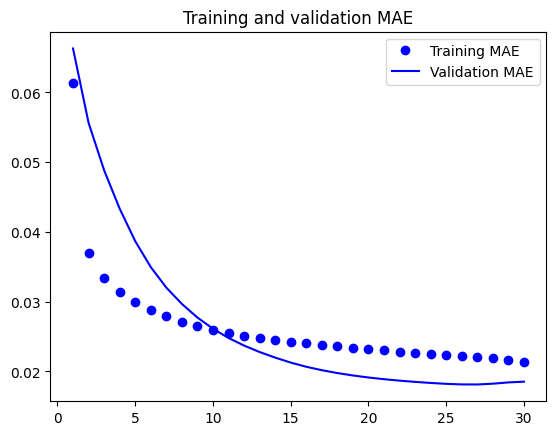

In [12]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

## Looking at the data

In [13]:
pred_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=1,
                    sequence_stride=1,
                    sequence_length=180,
                    shuffle=False, # Shouldn't the shuffle be set to 0?
                    seed=33,
                    batch_size=32,
                    start_index=num_train_samples,
                    end_index=num_train_samples + num_val_samples
                    )




In [14]:


predictions = model.predict(pred_dataset)

2023-04-24 14:33:13.730404: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [4678]
	 [[{{node Placeholder/_8}}]]
2023-04-24 14:33:13.731009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]


  1/147 [..............................] - ETA: 1:10

2023-04-24 14:33:14.055916: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-24 14:33:14.058123: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-24 14:33:14.059855: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

147/147 [==============================] - 3s 16ms/step


In [15]:
len(close[num_train_samples+180:num_train_samples + num_val_samples+1])

4678

In [16]:
len(predictions)

4678

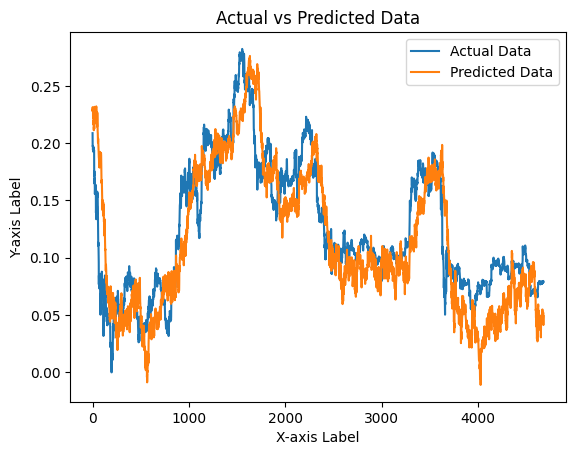

In [17]:
# Generate the predictions using your model and store it in a variable called 'predictions'

# Plot the actual data
plt.plot(range(len(predictions)), close[num_train_samples+180:num_train_samples + num_val_samples+1], label='Actual Data')

# Plot the predicted data
plt.plot(range(len(predictions)), predictions, label='Predicted Data')

# Add labels, title, and legend
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Actual vs Predicted Data')
plt.legend()

# Display the plot
plt.show()

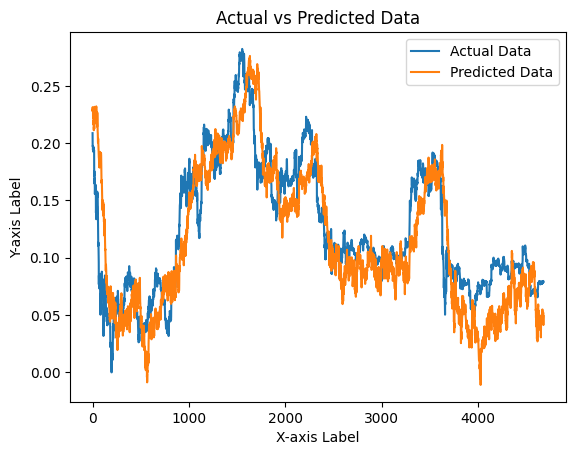

In [18]:
# Generate the predictions using your model and store it in a variable called 'predictions'


actual = close[num_train_samples+180:num_train_samples + num_val_samples+1]

# Plot the actual data
plt.plot(range(len(actual[0:24*5*60])), actual[0:24*5*60], label='Actual Data')

# Plot the predicted data
plt.plot(range(len(actual[0:24*5*60])), predictions[0:24*5*60], label='Predicted Data')

# Add labels, title, and legend
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Actual vs Predicted Data')
plt.legend()

# Display the plot
plt.show()

# BTC